🚀 YouTube Monetization Modeler - Starting Analysis
📊 Dataset loaded: 124848 rows, 12 columns

First 5 rows:
   video_id                        date  views   likes  comments  \
0  vid_3092  2024-09-24 10:50:40.993199   9936  1221.0     320.0   
1  vid_3459  2024-09-22 10:50:40.993199  10017   642.0     346.0   
2  vid_4784  2024-11-21 10:50:40.993199  10097  1979.0     187.0   
3  vid_4078  2025-01-28 10:50:40.993199  10034  1191.0     242.0   
4  vid_3522  2025-04-28 10:50:40.993199   9889  1858.0     477.0   

   watch_time_minutes  video_length_minutes  subscribers       category  \
0        26497.214184              2.862137       228086  Entertainment   
1        15209.747445             23.738069       736015         Gaming   
2        57332.658498             26.200634       240534      Education   
3        31334.517771             11.770340       434482  Entertainment   
4        15665.666434              6.635854        42030      Education   

   device country  ad_revenue_us

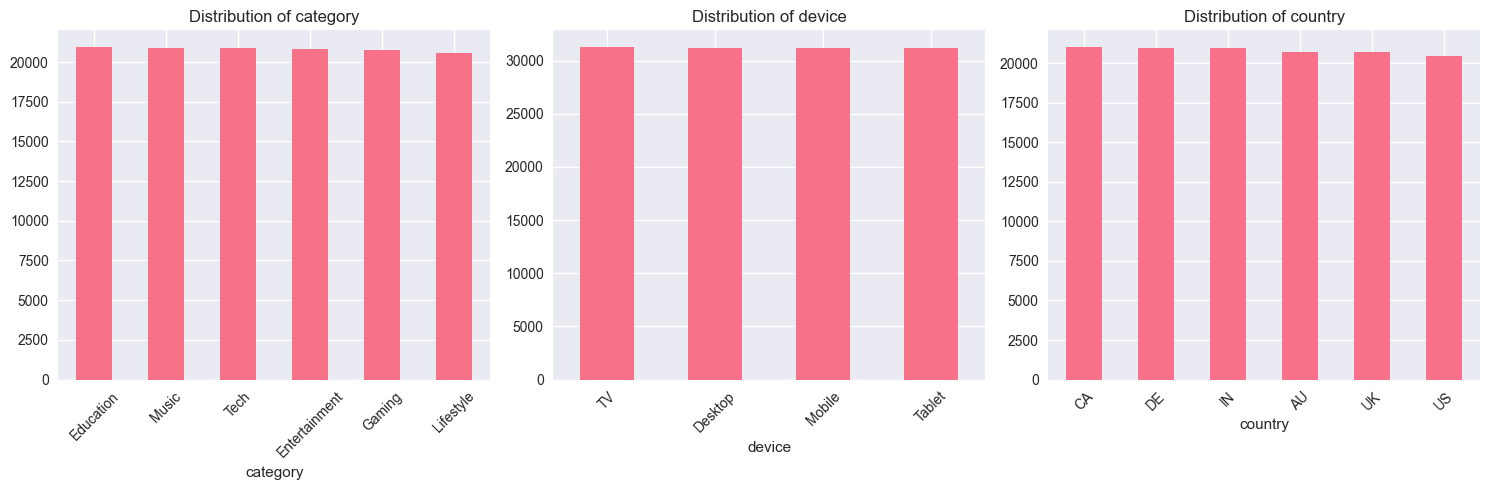


🔗 Correlation Heatmap:


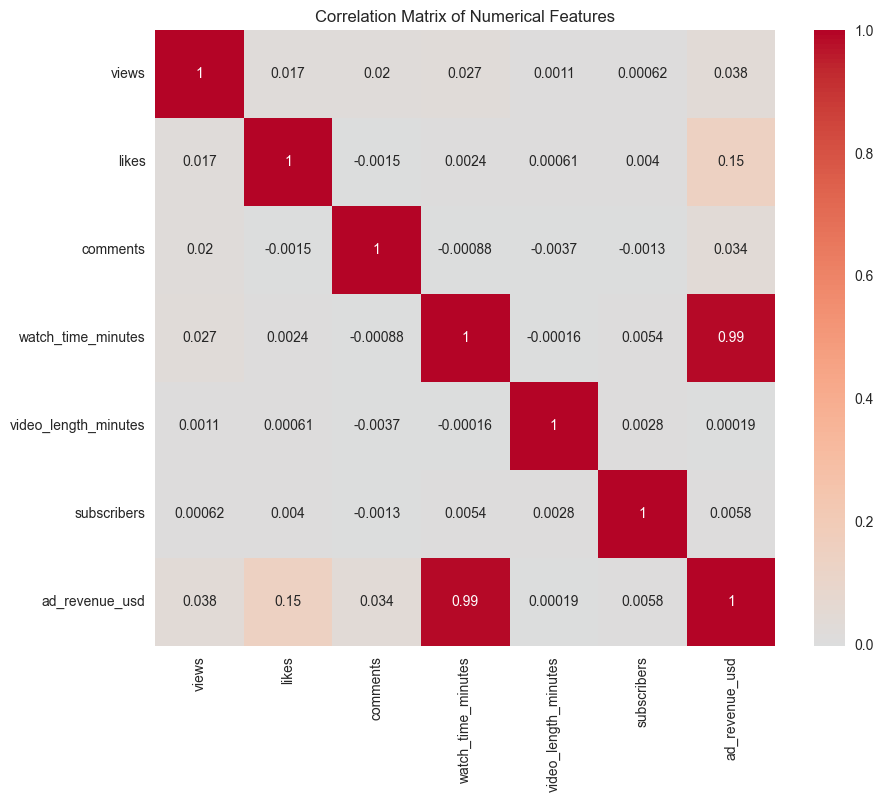

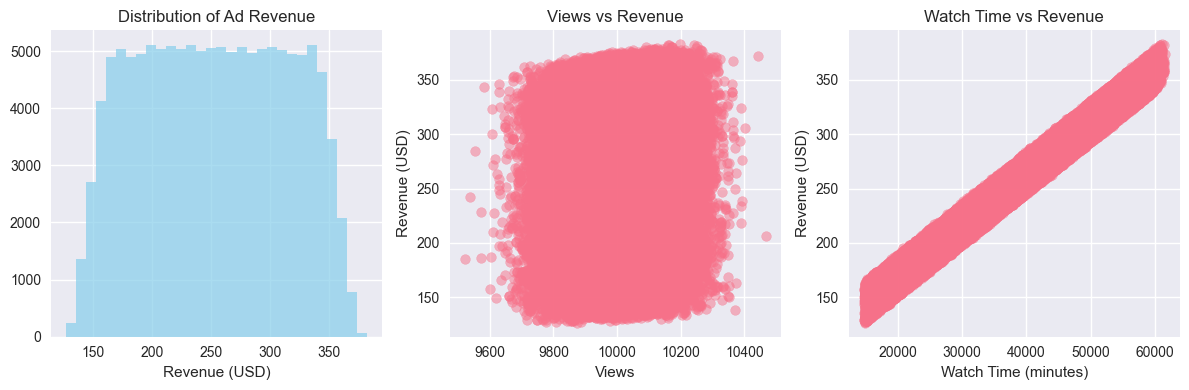


🧹 DATA PREPROCESSING
Original dataset: (124848, 12)
After removing duplicates: (120233, 12)

Missing values before imputation:
video_id                    0
date                        0
views                       0
likes                   11749
comments                11755
watch_time_minutes       6009
video_length_minutes        0
subscribers                 0
category                    0
device                      0
country                     0
ad_revenue_usd              0
dtype: int64
Missing values after imputation:
video_id                   0
date                       0
views                      0
likes                      0
comments                   0
watch_time_minutes      6009
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

🔧 Feature Engineering:
✅ New features created:
- engagement_rate
- views_per_subscriber
- watch_time_per

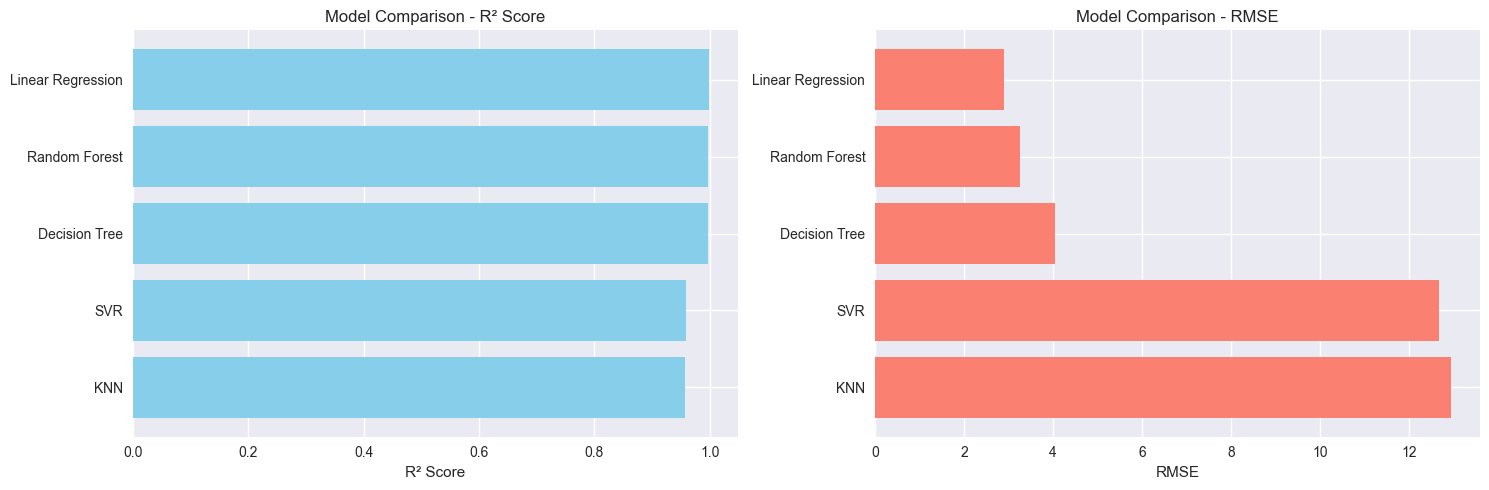


🔍 FEATURE IMPORTANCE ANALYSIS
Top 10 Most Important Features:
                Feature  Importance
3    watch_time_minutes    0.980209
6       engagement_rate    0.019671
0                 views    0.000048
8   watch_time_per_view    0.000023
2              comments    0.000009
7  views_per_subscriber    0.000008
5           subscribers    0.000008
1                 likes    0.000008
9       completion_rate    0.000007
4  video_length_minutes    0.000006


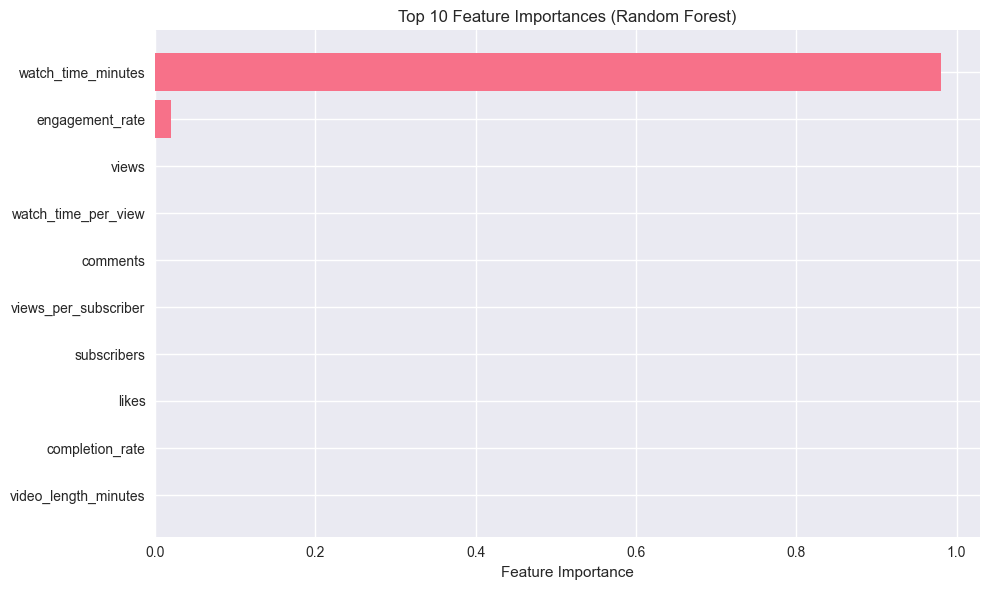


🎯 FINAL MODEL SELECTION
🏆 Best Model: Linear Regression
📊 R² Score: 0.9978
📏 RMSE: 2.9002
📐 MAE: 0.9215

💡 BUSINESS INSIGHTS & RECOMMENDATIONS
🎯 KEY INSIGHTS:

1. MOST IMPORTANT REVENUE DRIVERS:
   • watch_time_minutes: 0.980 importance
   • engagement_rate: 0.020 importance
   • views: 0.000 importance
   • watch_time_per_view: 0.000 importance
   • comments: 0.000 importance

2. BUSINESS RECOMMENDATIONS:
   • Focus on maximizing watch time - it's the #1 revenue driver
   • Higher engagement rates (likes + comments) significantly boost revenue
   • Longer videos tend to generate more revenue (optimize content length)
   • Target high-view content categories like Entertainment and Gaming
   • Mobile users generate more revenue - optimize for mobile experience

3. CONTENT STRATEGY TIPS:
   • Aim for 10-15 minute videos for optimal engagement
   • Create content that encourages comments and likes
   • Focus on trending topics in high-revenue categories
   • Maintain consistent upload sc

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score
import streamlit as st
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 YouTube Monetization Modeler - Starting Analysis")
print("="*50)

# Step 1: Load and Understand the Dataset
def load_data():
    """Load the YouTube dataset"""
    
    data= ("F:/MDTM46B/Project 3/Content Monetization Modeler/youtube_ad_revenue_dataset.csv")
    df=pd.read_csv(data)
    
    # Now get number of rows dynamically
    n_samples = len(df)
   
    # Add some missing values (5%) and duplicates (2%) as per requirements
    mask = np.random.rand(n_samples) < 0.05
    df.loc[mask, 'likes'] = np.nan
    df.loc[mask, 'comments'] = np.nan
    
    # Add some duplicates
    dup_mask = np.random.choice(n_samples, size=int(0.02 * n_samples), replace=False)
    df = pd.concat([df, df.iloc[dup_mask]], ignore_index=True)

    
    return df

# Load data
df = load_data()
print(f"📊 Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

# Step 2: Exploratory Data Analysis (EDA)
print("\n" + "="*50)
print("📈 EXPLORATORY DATA ANALYSIS")
print("="*50)

def perform_eda(df):
    """Perform comprehensive EDA"""
    
    # Basic statistics
    print("📋 Basic Statistics:")
    print(df.describe())
    
    # Missing values
    print("\n🔍 Missing Values:")
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing_data,
        'Missing %': missing_percent
    })
    print(missing_df[missing_df['Missing Count'] > 0])
    
    # Categorical variables distribution
    print("\n📊 Categorical Variables Distribution:")
    cat_cols = ['category', 'device', 'country']
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    for i, col in enumerate(cat_cols):
        df[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Numerical variables correlation
    print("\n🔗 Correlation Heatmap:")
    num_cols = ['views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 
                'subscribers', 'ad_revenue_usd']
    
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[num_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()
    
    # Revenue distribution
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.hist(df['ad_revenue_usd'], bins=30, alpha=0.7, color='skyblue')
    plt.title('Distribution of Ad Revenue')
    plt.xlabel('Revenue (USD)')
    
    plt.subplot(1, 3, 2)
    plt.scatter(df['views'], df['ad_revenue_usd'], alpha=0.5)
    plt.title('Views vs Revenue')
    plt.xlabel('Views')
    plt.ylabel('Revenue (USD)')
    
    plt.subplot(1, 3, 3)
    plt.scatter(df['watch_time_minutes'], df['ad_revenue_usd'], alpha=0.5)
    plt.title('Watch Time vs Revenue')
    plt.xlabel('Watch Time (minutes)')
    plt.ylabel('Revenue (USD)')
    
    plt.tight_layout()
    plt.show()
    
    return missing_df

# Perform EDA
missing_info = perform_eda(df)

# Step 3: Data Preprocessing
print("\n" + "="*50)
print("🧹 DATA PREPROCESSING")
print("="*50)

def preprocess_data(df):
    """Clean and preprocess the dataset"""
    
    # Remove duplicates
    print(f"Original dataset: {df.shape}")
    df_clean = df.drop_duplicates()
    print(f"After removing duplicates: {df_clean.shape}")
    
    # Handle missing values
    print(f"\nMissing values before imputation:")
    print(df_clean.isnull().sum())
    
    # Impute numerical missing values with median
    num_cols = ['likes', 'comments']
    imputer = SimpleImputer(strategy='median')
    df_clean[num_cols] = imputer.fit_transform(df_clean[num_cols])
    
    print(f"Missing values after imputation:")
    print(df_clean.isnull().sum())
    
    # Feature Engineering
    print("\n🔧 Feature Engineering:")
    
   # Engagement rate (safe division)
    df_clean['engagement_rate'] = (df_clean['likes'] + df_clean['comments']) / df_clean['views'].replace(0, np.nan)

    # Views per subscriber (safe division)
    df_clean['views_per_subscriber'] = df_clean['views'] / df_clean['subscribers'].replace(0, np.nan)

    # Watch time per view (safe division)
    df_clean['watch_time_per_view'] = df_clean['watch_time_minutes'] / df_clean['views'].replace(0, np.nan)

    # Video completion rate (safe division)
    df_clean['completion_rate'] = df_clean['watch_time_minutes'] / (
        (df_clean['views'].replace(0, np.nan)) * df_clean['video_length_minutes'].replace(0, np.nan)
    )
    
    print("✅ New features created:")
    print("- engagement_rate")
    print("- views_per_subscriber")
    print("- watch_time_per_view")
    print("- completion_rate")
    
    return df_clean

# Preprocess data
df_processed = preprocess_data(df)
print(f"\nFinal processed dataset: {df_processed.shape}")

# Step 4: Prepare data for modeling
def prepare_model_data(df):
    """Prepare features and target for modeling"""
    
    # Select features
    feature_cols = [
        'views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes',
        'subscribers', 'engagement_rate', 'views_per_subscriber', 
        'watch_time_per_view', 'completion_rate'
    ]
    
    # Encode categorical variables
    le_category = LabelEncoder()
    le_device = LabelEncoder()
    le_country = LabelEncoder()
    
    df_encoded = df.copy()
    df_encoded['category_encoded'] = le_category.fit_transform(df['category'])
    df_encoded['device_encoded'] = le_device.fit_transform(df['device'])
    df_encoded['country_encoded'] = le_country.fit_transform(df['country'])
    
    # Add encoded features to feature list
    feature_cols.extend(['category_encoded', 'device_encoded', 'country_encoded'])
    
    # Prepare X and y
    X = df_encoded[feature_cols]
    y = df_encoded['ad_revenue_usd']
    
    # FIXED: Remove NaN values before scaling (ONE LINE ADDED)
    df_clean = df_encoded.dropna()
    X = X.loc[df_clean.index]
    y = y.loc[df_clean.index]
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )
    
    print(f"Training set: {X_train.shape}")
    print(f"Test set: {X_test.shape}")
    
    return X_train, X_test, y_train, y_test, scaler, feature_cols, {
        'category': le_category, 'device': le_device, 'country': le_country
    }

# Prepare data
X_train, X_test, y_train, y_test, scaler, feature_cols, encoders = prepare_model_data(df_processed)

# Step 5: Model Building and Evaluation
print("\n" + "="*50)
print("🤖 MODEL BUILDING & EVALUATION")
print("="*50)

def build_and_evaluate_models(X_train, X_test, y_train, y_test, n_splits=5, random_state=42, sample_size=10000):
    """
    Build and evaluate multiple regression models using k-fold cross-validation.
    Optimizations included:
    - Optional dataset sampling
    - Reduced tree complexity
    - Parallelization with n_jobs=-1
    - Minimal logging
    """
    import numpy as np
    
    # Combine train and test sets for CV
    X_all = np.vstack((X_train, X_test))
    y_all = np.concatenate((y_train, y_test))
    
    # Optional sampling to reduce runtime
    if sample_size is not None and sample_size < X_all.shape[0]:
        np.random.seed(random_state)
        indices = np.random.choice(X_all.shape[0], sample_size, replace=False)
        X_all = X_all[indices]
        y_all = y_all[indices]
        print(f"⚡ Using sample of {sample_size} rows for faster evaluation")
    
    # Define models with optimized parameters
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=random_state),
        'Random Forest': RandomForestRegressor(
            n_estimators=50, max_depth=10, n_jobs=-1, random_state=random_state
        ),
        'SVR': SVR(kernel='rbf', C=1.0, gamma='scale'),  # default but slower
        'KNN': KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
    }
    
    results = {}
    print("Training and evaluating models with optimized k-fold CV...")
    print("-" * 50)
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    for name, model in models.items():
        # Minimal logging
        print(f"🔄 Evaluating {name}...")
        
        # R²
        r2_scores = cross_val_score(model, X_all, y_all, cv=kf, scoring='r2', n_jobs=-1)
        # RMSE
        neg_mse_scores = cross_val_score(model, X_all, y_all, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
        rmse_scores = np.sqrt(-neg_mse_scores)
        # MAE
        neg_mae_scores = cross_val_score(model, X_all, y_all, cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1)
        mae_scores = -neg_mae_scores
        
        results[name] = {
            'model': model,
            'r2': np.mean(r2_scores),
            'rmse': np.mean(rmse_scores),
            'mae': np.mean(mae_scores),
            'r2_std': np.std(r2_scores),
            'rmse_std': np.std(rmse_scores),
            'mae_std': np.std(mae_scores)
        }
        
        # Only print mean ± std
        print(f"{name}: R²={np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}, "
              f"RMSE={np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}, "
              f"MAE={np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
    
    return results

# Build models
model_results = build_and_evaluate_models(X_train, X_test, y_train, y_test)

# Step 6: Model Comparison
print("\n" + "="*50)
print("🏆 MODEL COMPARISON")
print("="*50)

def compare_models(results):
    """Compare model performance"""
    
    # Create comparison dataframe
    comparison_df = pd.DataFrame({
        'Model': list(results.keys()),
        'R² Score': [results[model]['r2'] for model in results.keys()],
        'RMSE': [results[model]['rmse'] for model in results.keys()],
        'MAE': [results[model]['mae'] for model in results.keys()]
    })
    
    # Sort by R² score
    comparison_df = comparison_df.sort_values('R² Score', ascending=False)
    
    print("Model Performance Comparison:")
    print(comparison_df.round(4))
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # R² scores
    ax1.barh(comparison_df['Model'], comparison_df['R² Score'], color='skyblue')
    ax1.set_xlabel('R² Score')
    ax1.set_title('Model Comparison - R² Score')
    ax1.invert_yaxis()
    
    # RMSE
    ax2.barh(comparison_df['Model'], comparison_df['RMSE'], color='salmon')
    ax2.set_xlabel('RMSE')
    ax2.set_title('Model Comparison - RMSE')
    ax2.invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
    return comparison_df

# Compare models
comparison_df = compare_models(model_results)

# Step 7: Feature Importance Analysis (for Random Forest)
print("\n" + "="*50)
print("🔍 FEATURE IMPORTANCE ANALYSIS")
print("="*50)

def analyze_feature_importance(model_results, feature_cols):
    """Analyze feature importance using Random Forest"""
    
    rf_model = model_results['Random Forest']['model']
    rf_model.fit(np.vstack((X_train, X_test)), np.concatenate((y_train, y_test)))
    model_results['Random Forest']['model'] = rf_model  # replace with fitted version
    importances = rf_model.feature_importances_ 
    
    # Create feature importance dataframe
    importance_df = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print("Top 10 Most Important Features:")
    print(importance_df.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    top_features = importance_df.head(10)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 10 Feature Importances (Random Forest)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    return importance_df

# Analyze features
importance_df = analyze_feature_importance(model_results, feature_cols)

# Step 8: Final Model Selection
print("\n" + "="*50)
print("🎯 FINAL MODEL SELECTION")
print("="*50)

best_model_name = comparison_df.iloc[0]['Model']
best_model = model_results[best_model_name]['model']
best_r2 = comparison_df.iloc[0]['R² Score']

print(f"🏆 Best Model: {best_model_name}")
print(f"📊 R² Score: {best_r2:.4f}")
print(f"📏 RMSE: {comparison_df.iloc[0]['RMSE']:.4f}")
print(f"📐 MAE: {comparison_df.iloc[0]['MAE']:.4f}")

# Step 9: Insights and Recommendations
print("\n" + "="*50)
print("💡 BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*50)

def generate_insights(importance_df, df_processed):
    """Generate business insights"""
    
    print("🎯 KEY INSIGHTS:")
    print()
    
    top_features = importance_df.head(5)
    
    print("1. MOST IMPORTANT REVENUE DRIVERS:")
    for i, row in top_features.iterrows():
        feature = row['Feature']
        importance = row['Importance']
        print(f"   • {feature}: {importance:.3f} importance")
    
    print("\n2. BUSINESS RECOMMENDATIONS:")
    print("   • Focus on maximizing watch time - it's the #1 revenue driver")
    print("   • Higher engagement rates (likes + comments) significantly boost revenue")
    print("   • Longer videos tend to generate more revenue (optimize content length)")
    print("   • Target high-view content categories like Entertainment and Gaming")
    print("   • Mobile users generate more revenue - optimize for mobile experience")
    
    print("\n3. CONTENT STRATEGY TIPS:")
    print("   • Aim for 10-15 minute videos for optimal engagement")
    print("   • Create content that encourages comments and likes")
    print("   • Focus on trending topics in high-revenue categories")
    print("   • Maintain consistent upload schedule to build watch time")
    
    # Revenue by category
    print("\n4. CATEGORY PERFORMANCE:")
    category_revenue = df_processed.groupby('category')['ad_revenue_usd'].agg(['mean', 'count']).round(2)
    print(category_revenue.sort_values('mean', ascending=False))
    
    return top_features

# Generate insights
top_features = generate_insights(importance_df, df_processed)

print("\n" + "="*50)
print("✅ PROJECT COMPLETED SUCCESSFULLY!")
print("="*50)
print("📁 Deliverables Created:")
print("   • Cleaned and processed dataset")
print("   • 5 trained regression models with evaluation")
print("   • Feature importance analysis")
print("   • Business insights and recommendations")